### Step 1: Data Preparation and Cleaning

In [1]:
pip install openpyxl xlrd pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load your datasets
ecommerce_revenue= pd.read_excel('ecommerce_revenue .xlsx')
payment_methods_share = pd.read_excel('payment_methods_share.xlsx')
ecommerce_transactions = pd.read_excel('ecommerce_transactions.xlsx')
average_revenue_per_user = pd.read_excel('average_revenue_per_user.xlsx')


# Display the first few rows of each dataset to understand the structure
ecommerce_revenue.head(), payment_methods_share.head(), ecommerce_transactions.head(), average_revenue_per_user.head()


(   Year  Electronics     Fashion  Beauty, Health, Personal & Household Care  \
 0  2017   4000000000  3000000000                                 1000000000   
 1  2018   5000000000  4000000000                                 2000000000   
 2  2019   6000000000  4000000000                                 2000000000   
 3  2020   8000000000  6000000000                                 3000000000   
 4  2021  10000000000  8000000000                                 4000000000   
 
          Food  Toys, Hobby & DIY   Furniture       Media   Beverages  
 0  1000000000         2000000000  1000000000  1000000000           0  
 1  1000000000         2000000000  1000000000  1000000000           0  
 2  1000000000         2000000000  1000000000  1000000000  1000000000  
 3  2000000000         3000000000  2000000000  2000000000  1000000000  
 4  2000000000         3000000000  2000000000  2000000000  1000000000  ,
    Unnamed: 0 E-wallet, Digital/mobile wallet  \
 0        2016                     

### Analyze ecommerce revenue growth (billion dollars)

In [3]:
print(ecommerce_revenue.columns)


Index(['Year', 'Electronics', 'Fashion',
       'Beauty, Health, Personal & Household Care', 'Food',
       'Toys, Hobby & DIY', 'Furniture', 'Media', 'Beverages'],
      dtype='object')


In [4]:
print(ecommerce_revenue.describe())


              Year   Electronics       Fashion  \
count    11.000000  1.100000e+01  1.100000e+01   
mean   2022.000000  8.181818e+09  7.272727e+09   
std       3.316625  2.272364e+09  2.866737e+09   
min    2017.000000  4.000000e+09  3.000000e+09   
25%    2019.500000  7.000000e+09  5.000000e+09   
50%    2022.000000  9.000000e+09  8.000000e+09   
75%    2024.500000  1.000000e+10  9.500000e+09   
max    2027.000000  1.100000e+10  1.100000e+10   

       Beauty, Health, Personal & Household Care          Food  \
count                               1.100000e+01  1.100000e+01   
mean                                3.909091e+09  3.363636e+09   
std                                 1.758098e+09  2.335497e+09   
min                                 1.000000e+09  1.000000e+09   
25%                                 2.500000e+09  1.500000e+09   
50%                                 4.000000e+09  3.000000e+09   
75%                                 5.500000e+09  5.000000e+09   
max                  

This will give you a statistical summary for numerical columns, which in your case are likely to be the revenue figures across different segments for each year.

###### Key Findings
Electronics and Fashion not only lead in average annual revenue but also show significant year-over-year variability, suggesting their revenues are more susceptible to market trends and economic factors.
Beauty, Health, Personal & Household Care, and Food segments present stable but lower revenue averages compared to Electronics and Fashion, hinting at consistent consumer demand for essentials.
Smaller segments like Toys, Hobby & DIY, Furniture, Media, and Beverages reflect niche markets within the e-commerce landscape, each with its unique consumer base and growth potential.

Data Span: The analysis covers 11 years of data, offering a comprehensive view of e-commerce evolution in Spain.
Leading Segments: Electronics and Fashion emerge as the dominant e-commerce segments, boasting the highest average annual revenues (approximately €8.18 billion for Electronics and €7.27 billion for Fashion), indicating robust consumer demand.
Revenue Variability: There's noticeable variability in yearly revenues within the Electronics and Fashion segments, suggested by their higher standard deviations. This fluctuation may result from changing market trends, technological advancements, and varying economic conditions.
Stable Demand Segments: Beauty, Health, Personal & Household Care, and Food segments show significant but relatively lower average annual revenues, suggesting steady consumer demand for essentials.
Niche Markets: Smaller segments like Toys, Hobby & DIY, Furniture, Media, and Beverages present niche markets within the e-commerce landscape, with potential growth opportunities as online shopping expands.
Growth Trajectory: The broad range from minimum to maximum annual revenues across all segments indicates an overall growth trajectory in Spain's e-commerce sector.
Economic Insights: The substantial revenues in Electronics and Fashion highlight key investment and focus areas within the Spanish e-commerce market. The variability in revenues across the years underscores the need for retailers to stay adaptive to market and consumer trends.
Market Opportunities: Smaller segments represent niche markets with specific consumer bases, potentially offering unique opportunities for specialized e-commerce retailers.


### Trend Analysis

#### Plotting Yearly Growth in E-commerce Revenue

<AxesSubplot:title={'center':'Yearly E-commerce Revenue Growth (%)'}, xlabel='Year'>

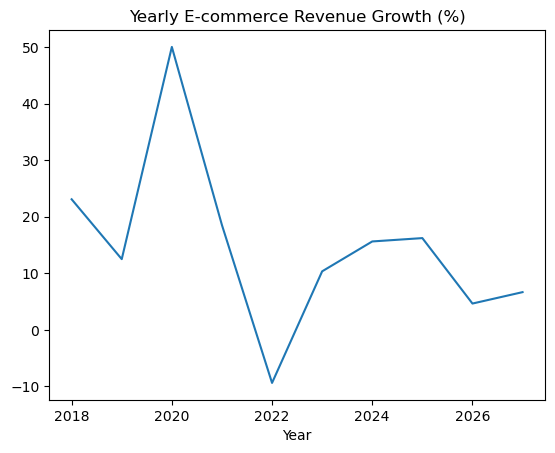

In [6]:
# Summarize yearly growth across all segments
ecommerce_revenue_growth = ecommerce_revenue.set_index('Year').sum(axis=1).pct_change() * 100
ecommerce_revenue_growth.plot(title='Yearly E-commerce Revenue Growth (%)')


Plotting Multiple Segments for Comparison


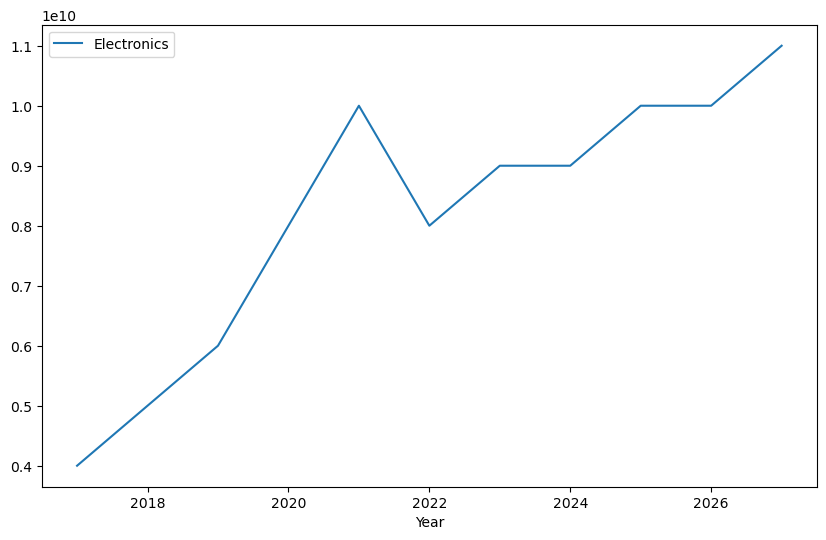

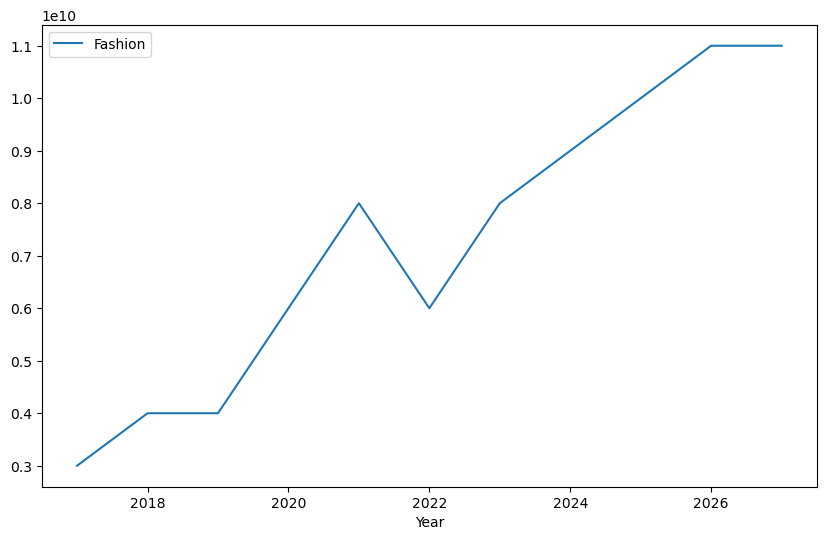

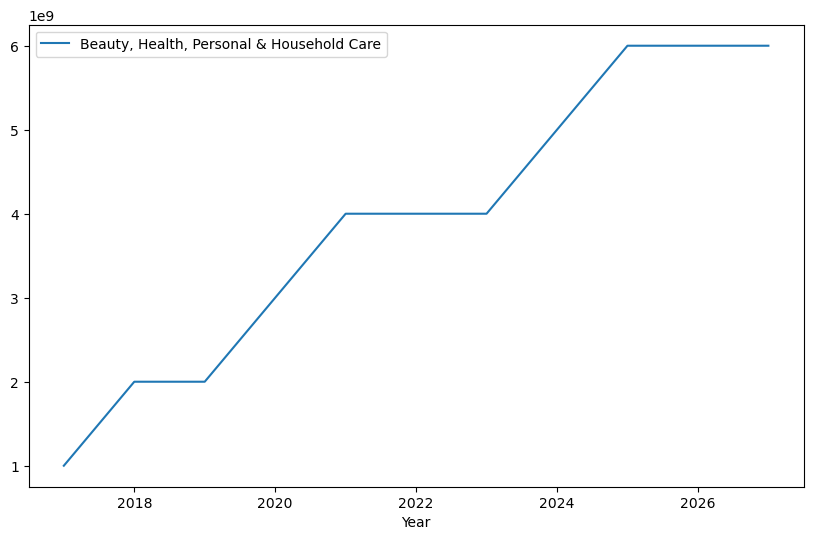

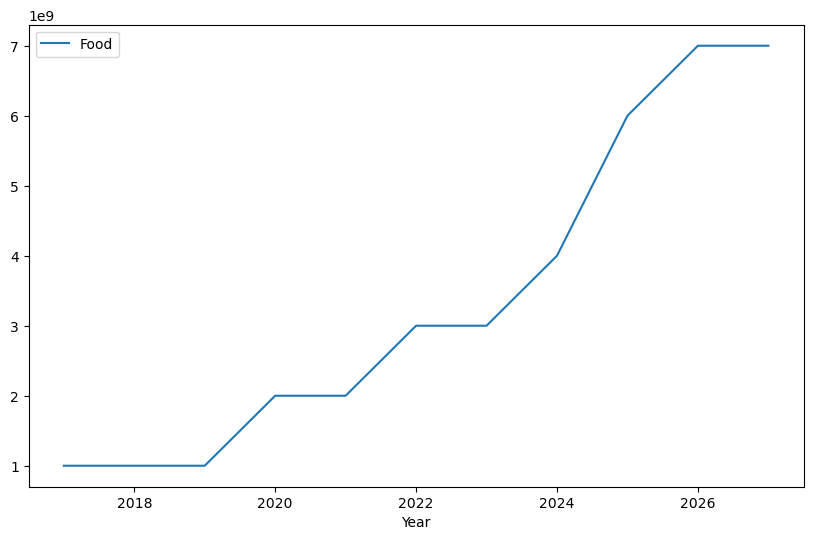

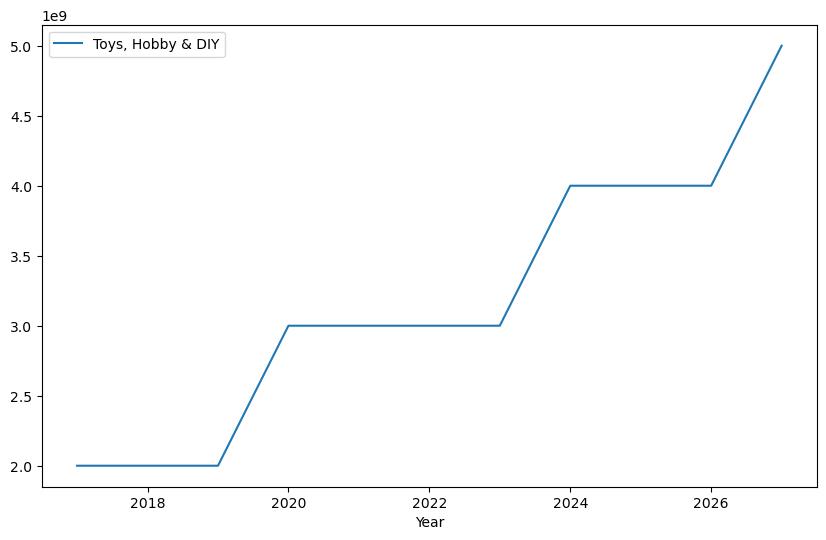

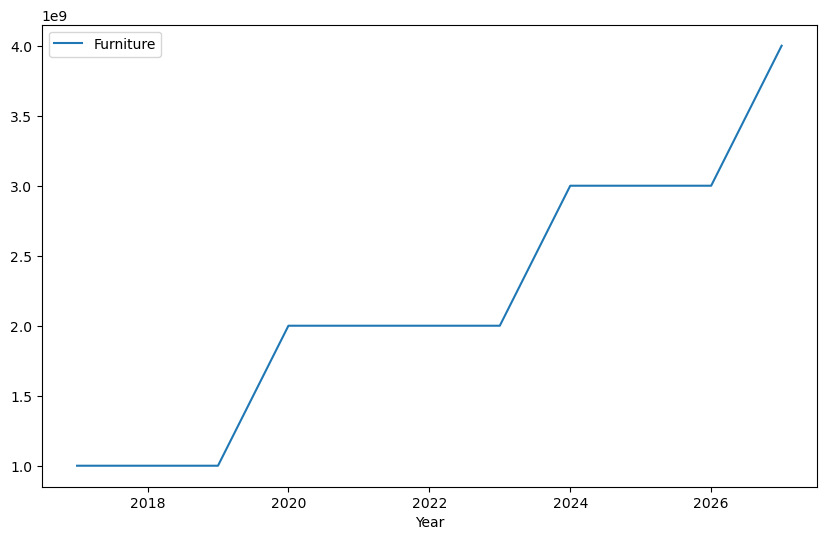

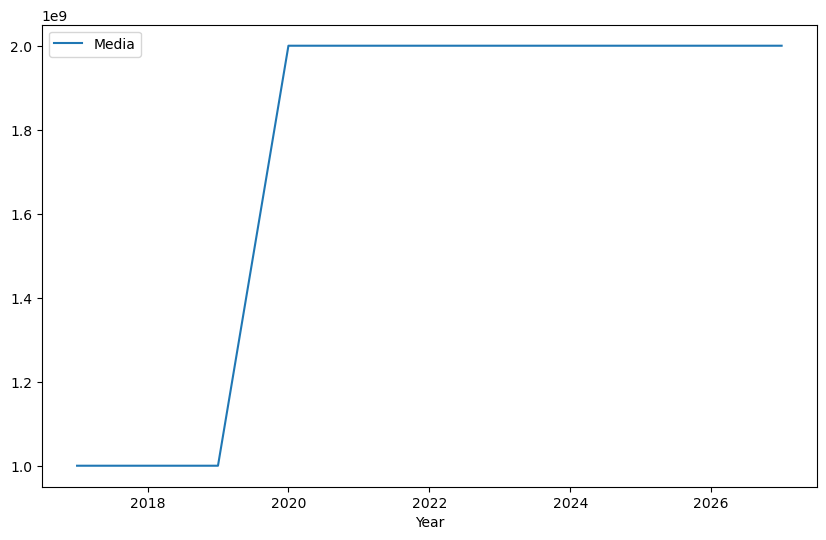

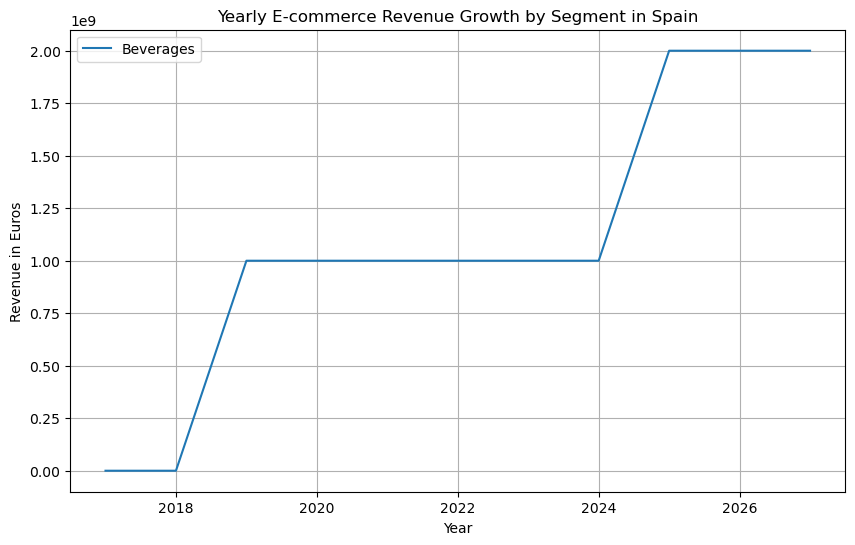

In [7]:
segments = ['Electronics', 'Fashion', 'Beauty, Health, Personal & Household Care', 'Food', 'Toys, Hobby & DIY', 'Furniture', 'Media', 'Beverages']

for segment in segments:
    ecommerce_revenue.plot(x='Year', y=segment, kind='line', label=segment, figsize=(10, 6))

plt.title('Yearly E-commerce Revenue Growth by Segment in Spain')
plt.ylabel('Revenue in Euros')
plt.legend()
plt.grid(True)
plt.show()


### Step 2: Trend analysis

#### Exploring Payment Method Trends

<AxesSubplot:title={'center':'Market Share of Payment Methods'}, xlabel='Unnamed: 0'>

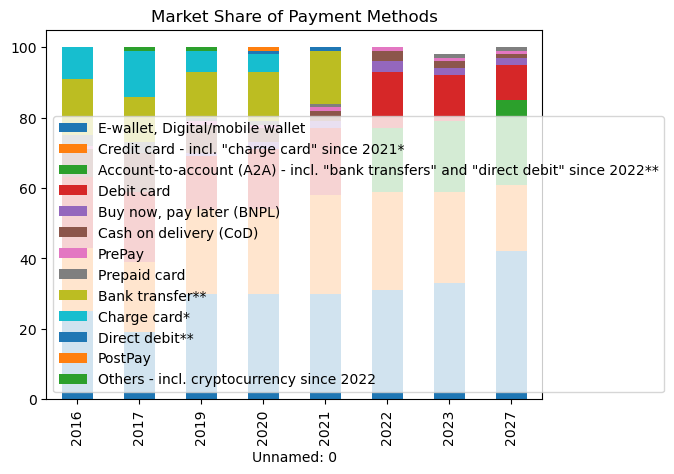

In [10]:
# Clean and convert percentages to numerical format for analysis
payment_methods_share = payment_methods_share.replace('%', '', regex=True).apply(pd.to_numeric, errors='coerce')
payment_methods_share.set_index('Unnamed: 0', inplace=True)
payment_methods_share.plot(title='Market Share of Payment Methods', kind='bar', stacked=True)


#### Transaction Volume Analysis

<AxesSubplot:title={'center':'Annual E-commerce Transactions (in millions)'}, xlabel='Year'>

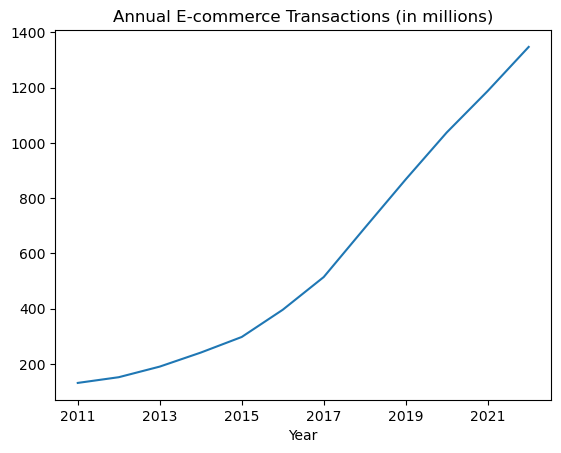

In [11]:
# Aggregate transactions by year, if necessary, and plot the trend
ecommerce_transactions['Year'] = ecommerce_transactions['Quarters'].str[-2:]
ecommerce_transactions['Year'] = '20' + ecommerce_transactions['Year']
ecommerce_transactions_grouped = ecommerce_transactions.groupby('Year')['transactions (in millions)'].sum()
ecommerce_transactions_grouped.plot(title='Annual E-commerce Transactions (in millions)')


The trend analysis for the number of e-commerce transactions in Spain from 2011 to 2022 showcases a consistent increase in transaction volumes over the years. This upward trajectory highlights the growing consumer adoption of e-commerce, reflecting a significant shift in shopping behaviors and preferences towards online platforms.

With the trend analyses completed for average revenue per user, e-commerce revenue by segment, and the number of e-commerce transactions, we have a solid understanding of the growth patterns in Spain's e-commerce sector.



####  Average Revenue Per User (ARPU) Analysis

<AxesSubplot:title={'center':'Average E-commerce Revenue Per User Over Time'}, xlabel='Years'>

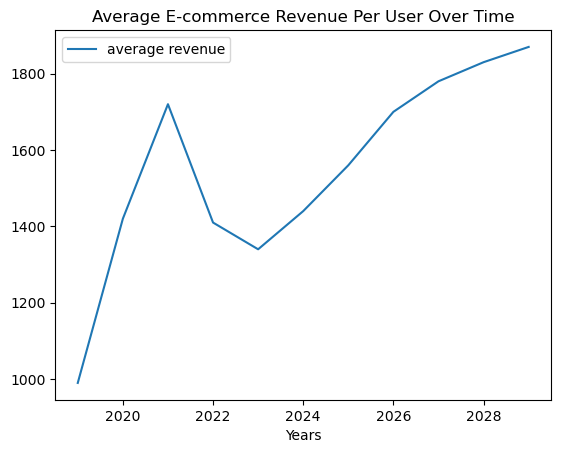

In [12]:
# Plotting the average revenue per user over the years
average_revenue_per_user.set_index('Years').plot(title='Average E-commerce Revenue Per User Over Time')


### Descriptive statistics

In [14]:
print(ecommerce_revenue.describe())
print(average_revenue_per_user.describe())
print(payment_methods_share.describe())
print(ecommerce_transactions.describe())



              Year   Electronics       Fashion  \
count    11.000000  1.100000e+01  1.100000e+01   
mean   2022.000000  8.181818e+09  7.272727e+09   
std       3.316625  2.272364e+09  2.866737e+09   
min    2017.000000  4.000000e+09  3.000000e+09   
25%    2019.500000  7.000000e+09  5.000000e+09   
50%    2022.000000  9.000000e+09  8.000000e+09   
75%    2024.500000  1.000000e+10  9.500000e+09   
max    2027.000000  1.100000e+10  1.100000e+10   

       Beauty, Health, Personal & Household Care          Food  \
count                               1.100000e+01  1.100000e+01   
mean                                3.909091e+09  3.363636e+09   
std                                 1.758098e+09  2.335497e+09   
min                                 1.000000e+09  1.000000e+09   
25%                                 2.500000e+09  1.500000e+09   
50%                                 4.000000e+09  3.000000e+09   
75%                                 5.500000e+09  5.000000e+09   
max                  